#### Task 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

timestamps_theta, theta_values = np.loadtxt("./series-dtheta.dat", usecols=(0,1), unpack=True)
timestamps_phi, phi_values = np.loadtxt("./series-dphi.dat", usecols=(0,1), unpack=True)

def log_normal_distribution(s, theta, phi):
    return (1 / s*np.sqrt(2*np.pi*theta)) * np.exp(-((np.log(s) - phi)**2) / 2*theta**2)

#### Task 1

In [4]:
print("Numpy correlation between the theta and phi values:", np.correlate(theta_values, phi_values))
print("Numpy correlation coefficient between the theta and phi values:", np.corrcoef(theta_values, phi_values))

Numpy correlation between the theta and phi values: [-60.91278362]
Numpy correlation coefficient between the theta and phi values: [[ 1.         -0.23110201]
 [-0.23110201  1.        ]]


The correlation between Theta and Phi is -60.912 where if x grows y grows and if the value of x decreases the value of y decreases and vice versa.

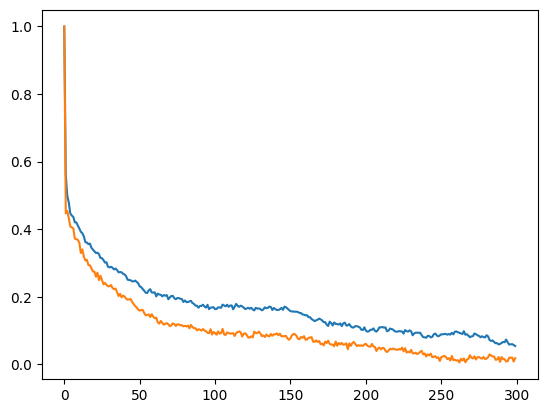

In [10]:
# Calculating the autocorrelation for the Theta and Phi
# why all this??? understand it
npttau = 300

mean_theta = np.mean(theta_values)
variance_theta = np.var(theta_values)
series_theta = theta_values - mean_theta
autocorrelation_series_theta = np.correlate(series_theta, series_theta, mode='full')

npt = int(autocorrelation_series_theta.size/2)
plt.plot(autocorrelation_series_theta[npt:(npt+npttau)]/(variance_theta*npt), label="Autocorrelation series-dtheta")


mean_phi = np.mean(phi_values)
variance_phi = np.var(phi_values)
series_phi = phi_values - mean_phi
autocorrelation_series_phi = np.correlate(series_phi, series_phi, mode='full')

npt = int(autocorrelation_series_phi.size/2)
plt.plot(autocorrelation_series_phi[npt:(npt+npttau)]/(variance_phi*npt), label="Autocorrelation series/dphi")

#### Task 2

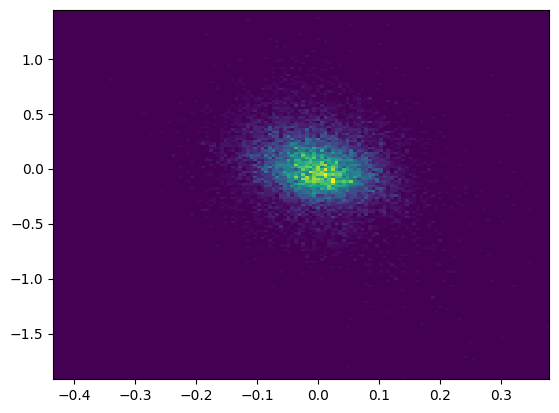

In [7]:
# plt.hist2d(theta_values, phi_values, bins=25)
# plt.show()

# Incorrect, correction
hist_theta, bins_theta = np.histogram(theta_values, bins='auto')
hist_phi, bins_phi = np.histogram(phi_values, bins='auto')
plt.hist2d(theta_values, phi_values, bins=[bins_theta, bins_phi])
plt.show()